# <font size=8>Diagnostics for Classification Problems

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from scipy.stats import norm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split as tts

In [4]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

## Example with Definitions



<figure>
<center>
<img src='https://drive.google.com/uc?id=1Jo33JnOvLTnUmVM61_m5izwI2uD8nvqk' 
width='1000px' height='550px' />
<figcaption>Summary of Quality Measures for Classification - Source: WiKi</figcaption></center>
</figure>

In [5]:
# the harmonic mean of a and b
a = 38
b = 42
h = 2/(1/a + 1/b)
g  = np.sqrt(a*b)
ar = (a+b)/2

In [6]:
[h, g, ar]

[39.900000000000006, 39.949968710876355, 40.0]

The F1 -score is the harmonic mean between precision and recall.

In [36]:
df = pd.read_csv('ElectricalGridData.csv')

In [37]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [38]:
df.shape

(10000, 14)

In [39]:
# how many different labels we need?
np.unique(df['stabf'])

array(['stable', 'unstable'], dtype=object)

In [40]:
labels = LabelEncoder()
y = labels.fit_transform(df['stabf'])
y

array([1, 0, 1, ..., 0, 1, 1])

In [41]:
y = (y==0) + 0 # this coding is flipping the labels

In [42]:
y

array([0, 1, 0, ..., 1, 0, 0])

In [43]:
x = df.loc[:,'tau1':'g4'].values

In [44]:
x.shape

(10000, 12)

In [45]:
classifier = LogisticRegression(solver='lbfgs',max_iter=100000)

In [46]:
classifier.fit(x,y)

LogisticRegression(max_iter=100000)

In [47]:
print(classification_report(y,classifier.predict(x)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6380
           1       0.77      0.70      0.73      3620

    accuracy                           0.82     10000
   macro avg       0.80      0.79      0.80     10000
weighted avg       0.81      0.82      0.81     10000



In [53]:
report = classification_report(y,classifier.predict(x),output_dict=True)

In [23]:
report['1']['recall']

0.879153605015674

In [24]:
from sklearn.svm import SVC

In [26]:
model = SVC(kernel = 'poly',C=1,degree = 3)

In [27]:
model.fit(x,y)

SVC(C=1, kernel='poly')

In [29]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3620
           1       0.94      0.93      0.94      6380

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



### In general we want that both recalls are as high as possible and the difference between the recalls is as small as possible.

In [ ]:
##<font size=6> The Receiver Operating Characteristic Curve </font>

A ROC curve is a plot of the true positive rate (Sensitivity) in function of the false positive rate (100-Specificity) for different cut-off points of a parameter. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. The Area Under the ROC curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal).

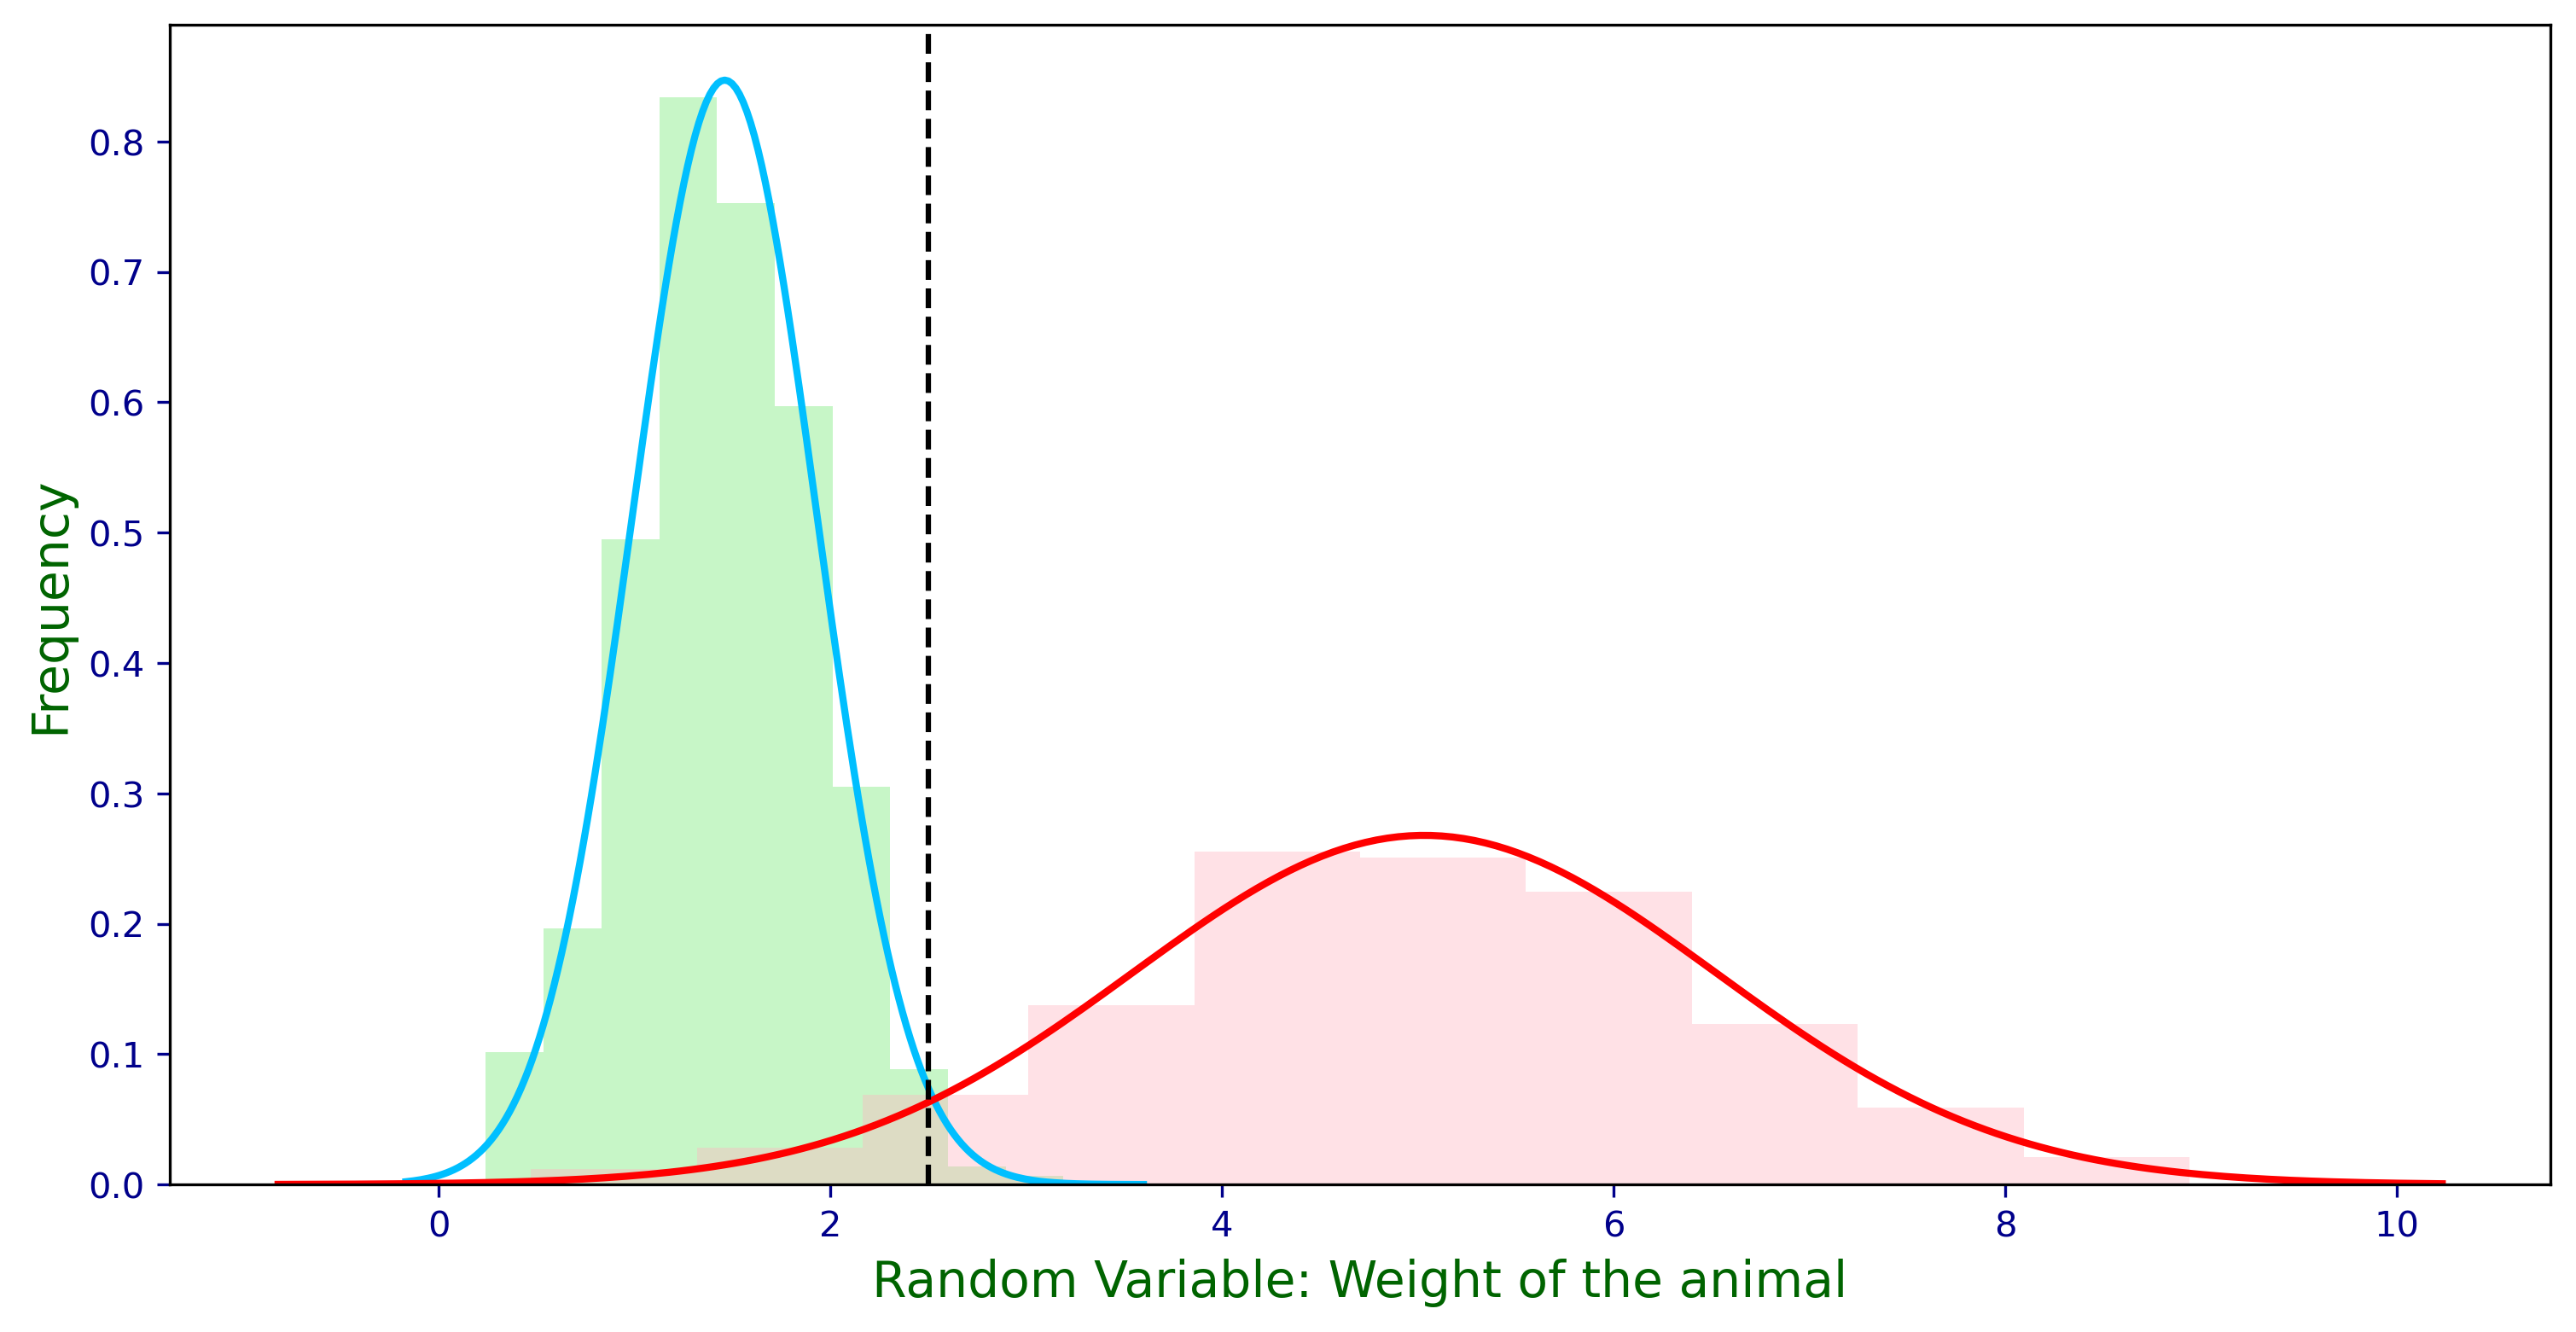

In [30]:
plt.figure(figsize=(12,6))
data_weights = np.concatenate([norm.rvs(size=500,loc=1.5,scale=0.5),norm.rvs(size=500,loc=5,scale=1.5)],axis=0)
data_weights = np.round(data_weights,2)
animal = np.repeat([0,1],500)
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data_weights[:500],
                  bins=10,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightgreen','alpha':0.5},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue','lw':2}
                   )
ax1 = sns.distplot(data_weights[500:-1],
                  bins=10,
                  kde=False,
                  color='red',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'red','lw':2}
                   )
ax1.set_xlabel('Random Variable: Weight of the animal',fontsize=14,color='darkgreen')
ax1.set_ylabel('Frequency',fontsize=14,color='darkgreen')
l1 = ax1.lines[0]
plt.axvline(x=2.5, color='black',linestyle='dashed')

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
#ax1.fill_between(x,y, where = x <= 3.0, color='palegreen',alpha=0.5)

### We can create a ROC curve based on the TPR and FPR at each value of the threshold

In [31]:
model = LogisticRegression()

In [32]:
model.fit(data_weights.reshape(-1,1),animal)

LogisticRegression()

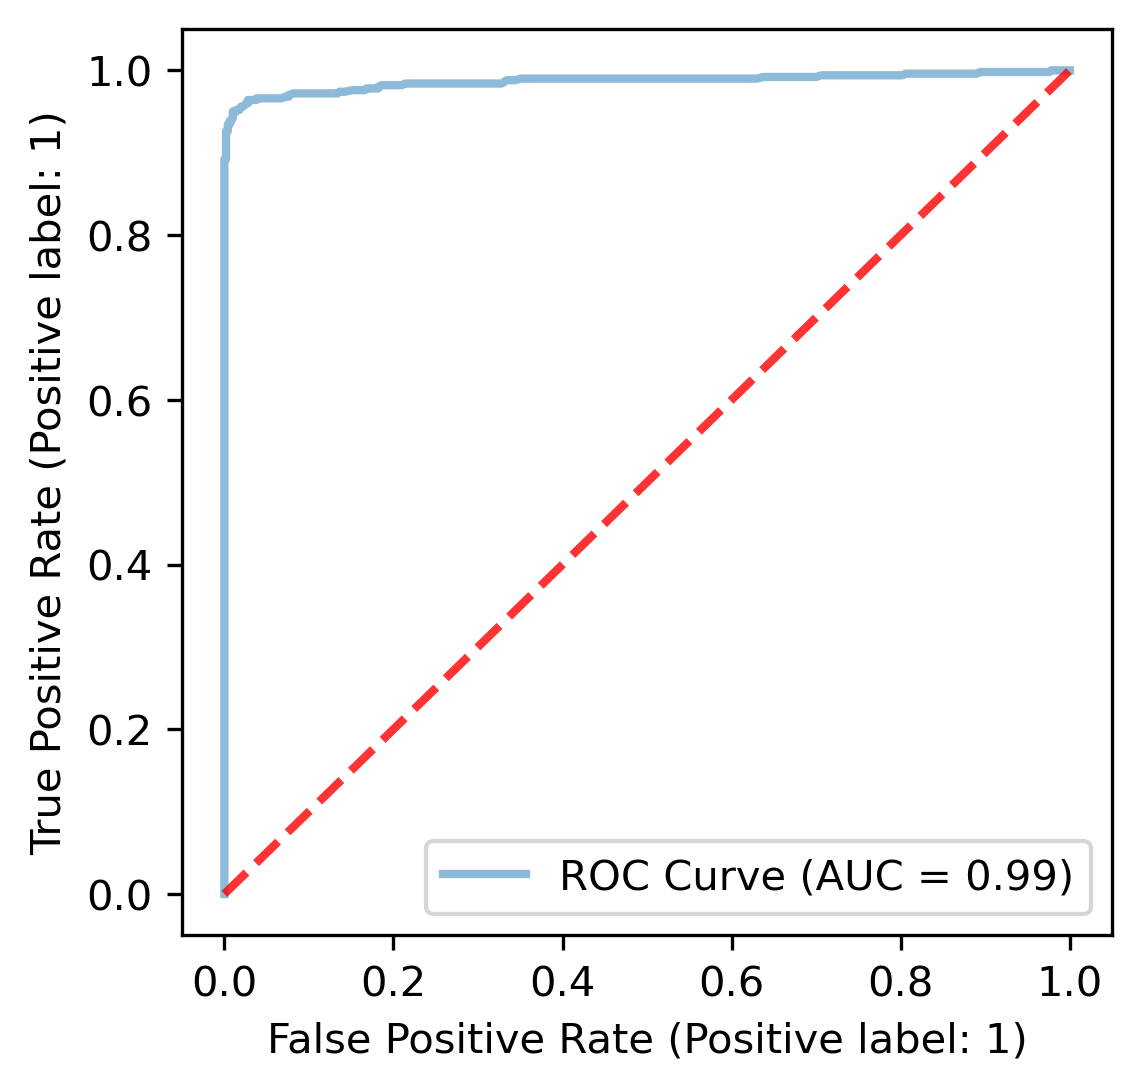

In [33]:
fig, ax = plt.subplots(figsize=(4,4))
plot_roc_curve(model, data_weights.reshape(-1,1), animal,
                         name='ROC Curve',
                         alpha=0.5, lw=2, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.show()

## ROC curves with the real data example and stratified KFold cross-validations

In [28]:
x = df.loc[:,'tau1':'g4'].values
labels = LabelEncoder()
y = labels.fit_transform(df['stabf'])

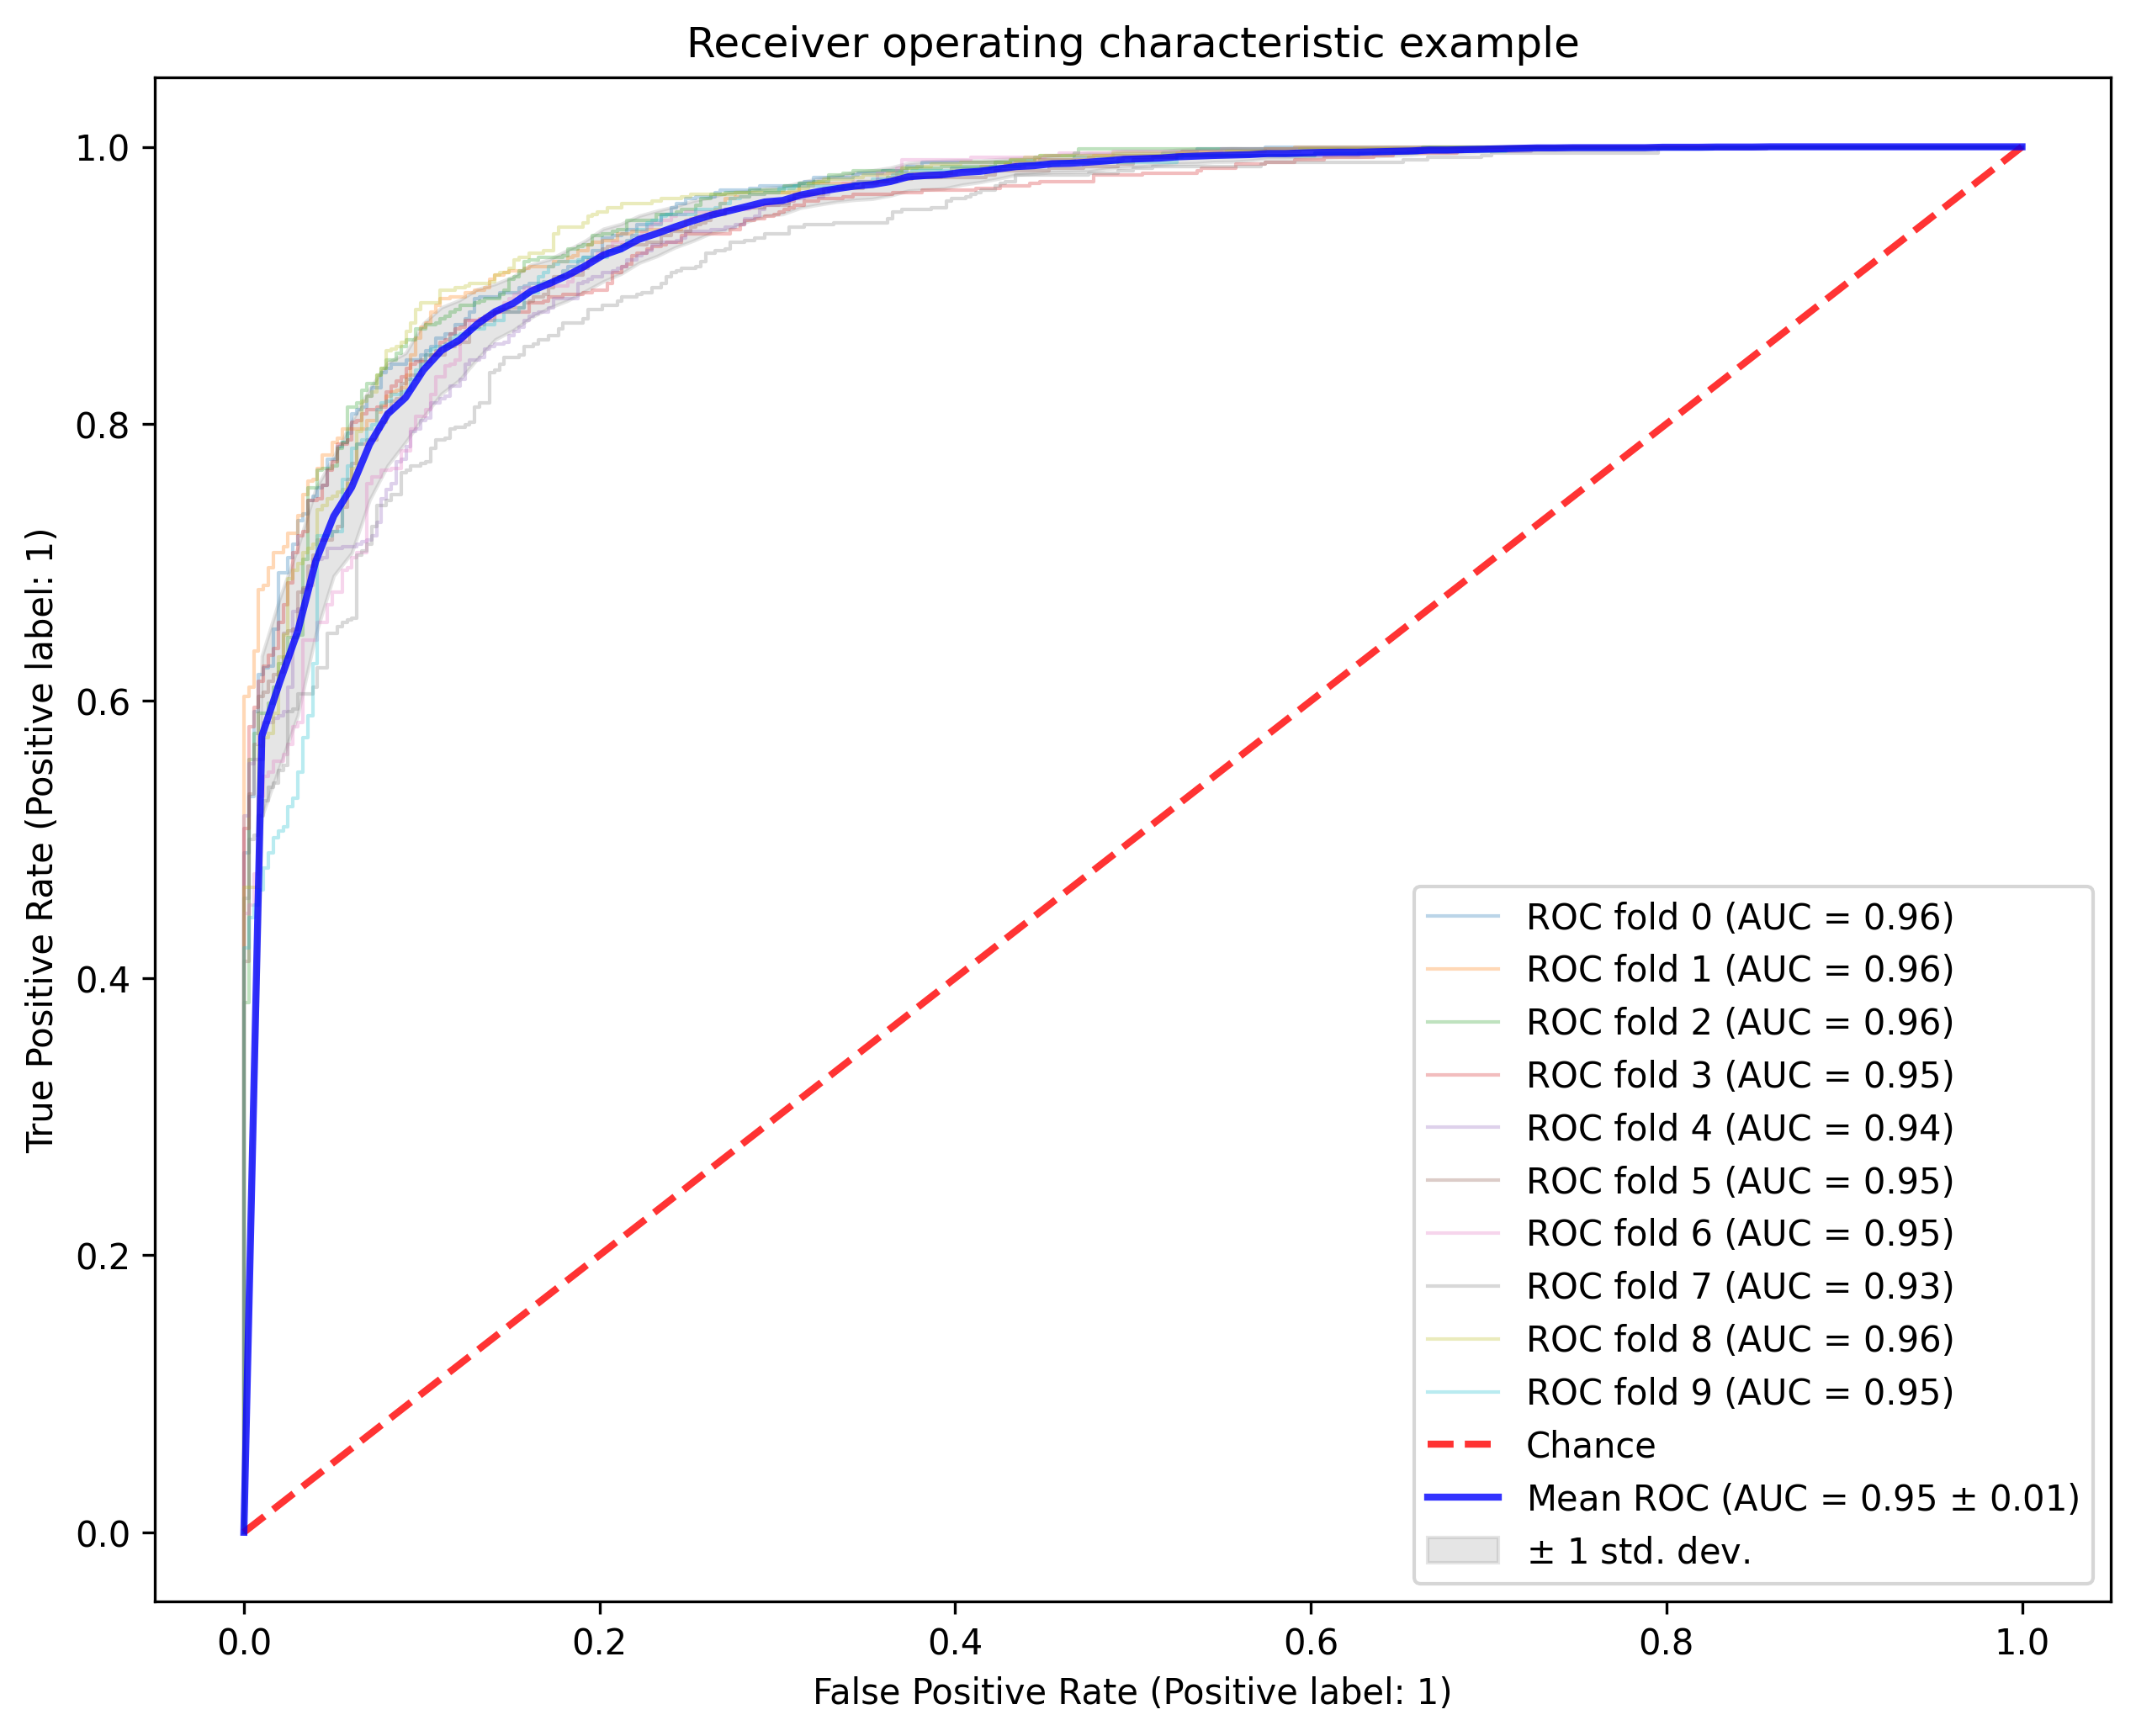

In [29]:
n_samples, n_features = x.shape


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10,shuffle = True,random_state=310)
#classifier = SVC(kernel='rbf', degree=3,probability=True,random_state=310)
#classifier = LogisticRegression(solver='lbfgs',max_iter=100000)
classifier = RandomForestClassifier(n_estimators=100,max_depth=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10,8))
for i, (train, test) in enumerate(cv.split(x, y)):
    classifier.fit(x[train], y[train])
    viz = plot_roc_curve(classifier, x[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [52]:
?StratifiedKFold

Init signature: StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)
Docstring:     
Stratified K-Folds cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns
stratified folds. The folds are made by preserving the percentage of
samples for each class.

Read more in the :ref:`User Guide <stratified_k_fold>`.

Parameters
----------
n_splits : int, default=5
    Number of folds. Must be at least 2.

    .. versionchanged:: 0.22
        ``n_splits`` default value changed from 3 to 5.

shuffle : bool, default=False
    Whether to shuffle each class's samples before splitting into batches.
    Note that the samples within each split will not be shuffled.

random_state : int, RandomState instance or None, default=None
    When `shuffle` is True, `random_state` affects the ordering of the
    indices, which controls the randomness of each fold for each class.
    Otherwise, leave `random_sta

In [50]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi